In [58]:
#Importation des bibliotheques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# Charger les données
df = pd.read_excel('online_retail_II.xlsx')

In [64]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [17]:
# Explorer la distribution des variables
df['Valeur Totale'] = df['Quantity'] * df['Price']

In [19]:
# Statistiques descriptives
print(df[['Quantity', 'Price', 'Valeur Totale']].describe())

            Quantity          Price  Valeur Totale
count  525461.000000  525461.000000  525461.000000
mean       10.337667       4.688834      18.154506
std       107.424110     146.126914     160.333083
min     -9600.000000  -53594.360000  -53594.360000
25%         1.000000       1.250000       3.750000
50%         3.000000       2.100000       9.950000
75%        10.000000       4.210000      17.700000
max     19152.000000   25111.090000   25111.090000


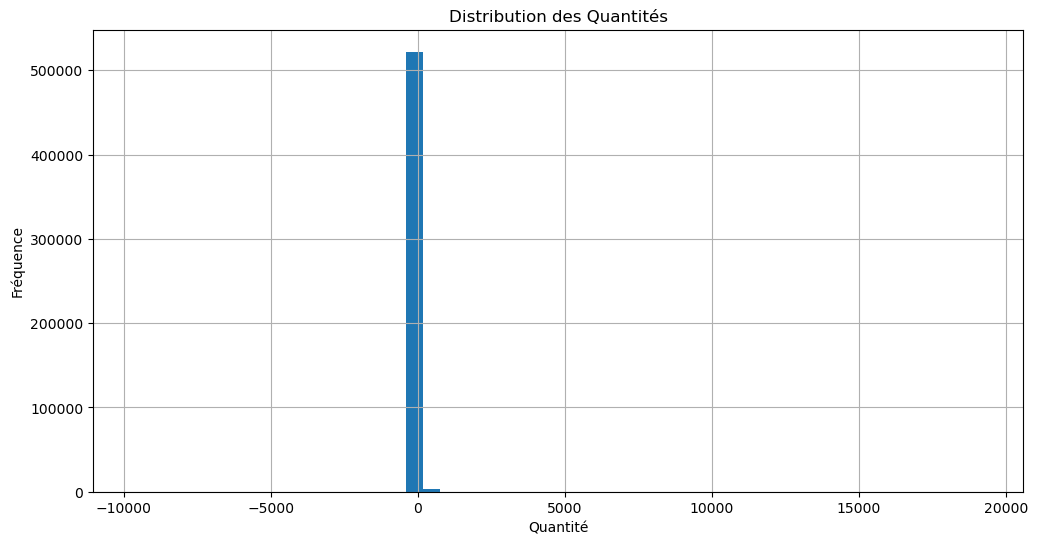

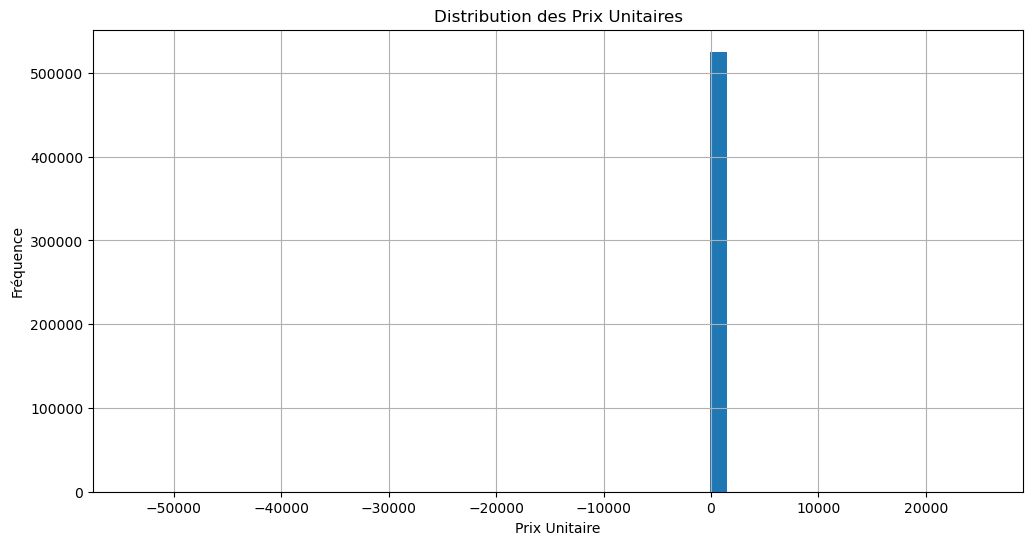

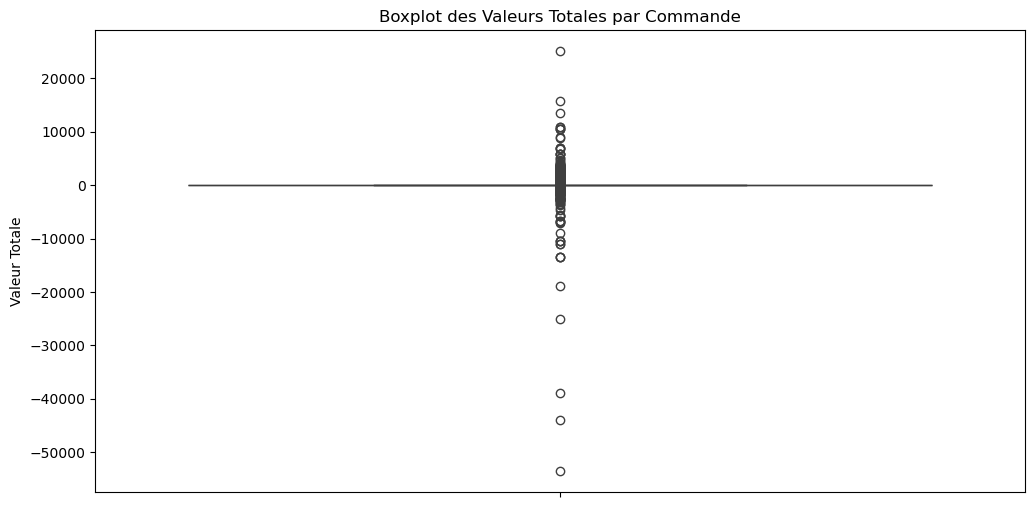

In [29]:
# Histogramme des quantités
plt.figure(figsize=(12,6))
df['Quantity'].hist(bins=50)
plt.title('Distribution des Quantités')
plt.xlabel('Quantité')
plt.ylabel('Fréquence')
plt.show()
# Histogramme des prix unitaires
plt.figure(figsize=(12,6))
df['Price'].hist(bins=50)
plt.title('Distribution des Prix Unitaires')
plt.xlabel('Prix Unitaire')
plt.ylabel('Fréquence')
plt.show()

# Boxplot pour détecter les outliers des valeurs totales
plt.figure(figsize=(12,6))
sns.boxplot(df['Valeur Totale'])
plt.title('Boxplot des Valeurs Totales par Commande')
plt.show()

In [31]:
# Identifier les anomalies (quantités négatives)
anomalies_quantite_neg = df[df['Quantity'] < 0]
print(f"Nombre de factures annulées : {anomalies_quantite_neg.shape[0]}")

Nombre de factures annulées : 12326


In [35]:
# Identifier les commandes sans identifiant client
clients_sans_id = df[df['Customer ID'].isnull()]
print(f"Nombre de commandes sans identifiant client : {clients_sans_id.shape[0]}")

Nombre de commandes sans identifiant client : 107927


In [37]:
# Calculer la récence, fréquence et valeur monétaire par client
# Convertir 'InvoiceDate' en format datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [39]:
# Calcul RFM
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (pd.to_datetime('today') - x.max()).days,  # Recency
    'Invoice': 'count',                                               # Frequency
    'Valeur Totale': 'sum'                                              # Monetary
}).rename(columns={
    'InvoiceDate': 'Recency',
    'Invoice': 'Frequency',
    'Valeur Totale': 'Monetary'
})

In [41]:
print(rfm.head())

             Recency  Frequency  Monetary
Customer ID                              
12346.0         5136         46    -64.68
12347.0         5072         71   1323.32
12348.0         5143         20    222.16
12349.0         5112        107   2646.99
12351.0         5080         21    300.93


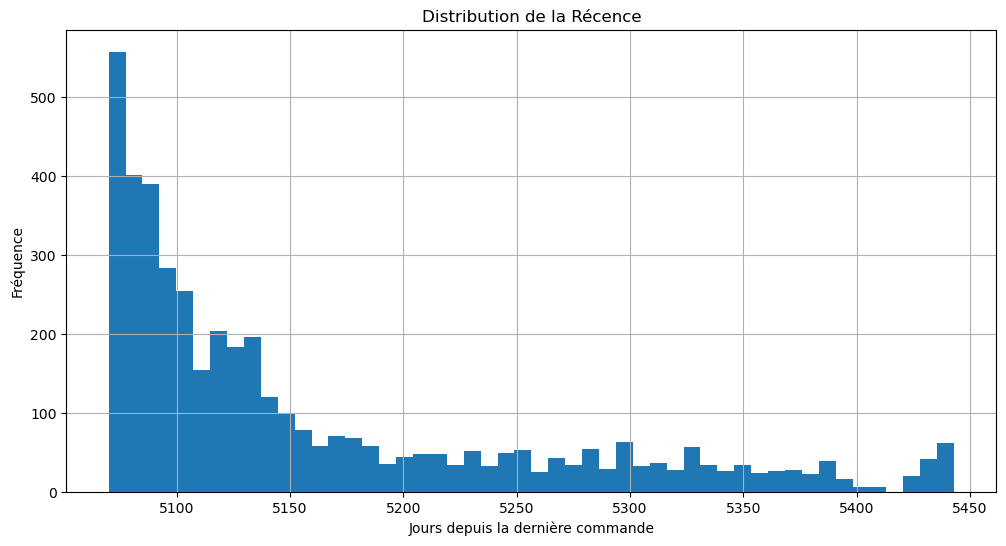

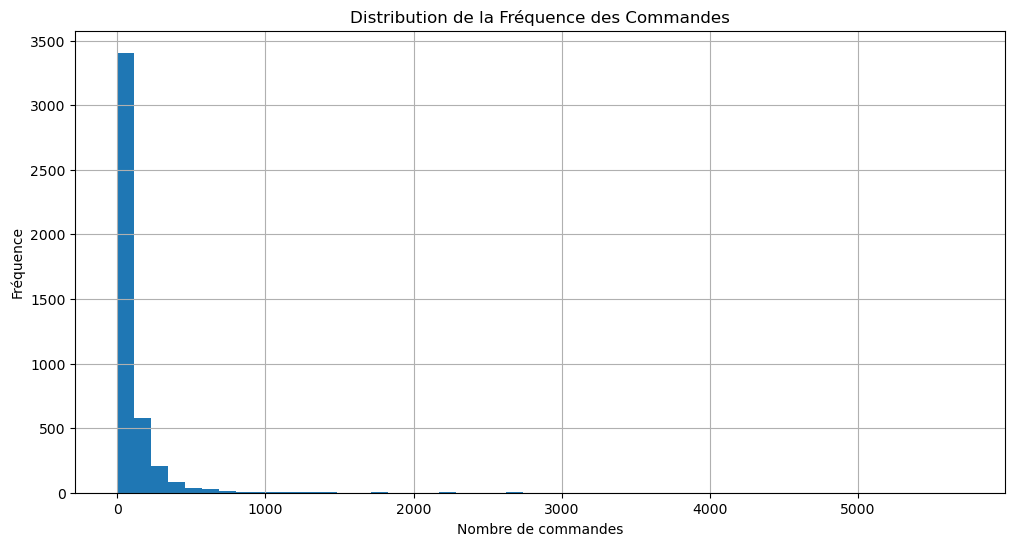

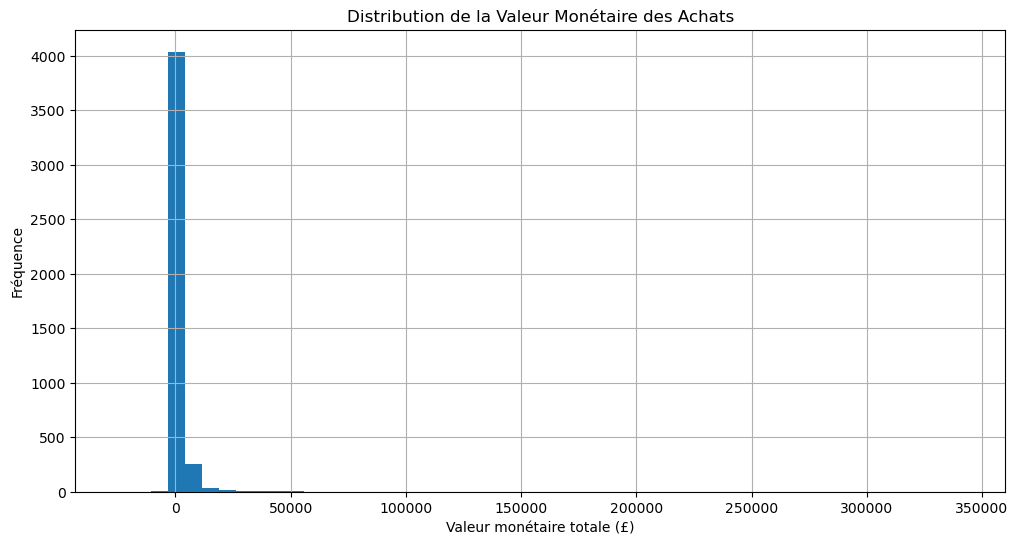

In [43]:
# Histogrammes RFM
plt.figure(figsize=(12,6))
rfm['Recency'].hist(bins=50)
plt.title('Distribution de la Récence')
plt.xlabel('Jours depuis la dernière commande')
plt.ylabel('Fréquence')
plt.show()

plt.figure(figsize=(12,6))
rfm['Frequency'].hist(bins=50)
plt.title('Distribution de la Fréquence des Commandes')
plt.xlabel('Nombre de commandes')
plt.ylabel('Fréquence')
plt.show()

plt.figure(figsize=(12,6))
rfm['Monetary'].hist(bins=50)
plt.title('Distribution de la Valeur Monétaire des Achats')
plt.xlabel('Valeur monétaire totale (£)')
plt.ylabel('Fréquence')
plt.show()

In [63]:
print(df.isna().sum())

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


In [70]:
# Supprimer les lignes avec des 'CustomerID' manquants
df = df.dropna(subset=['Customer ID'])
# Traiter les quantités négatives
df = df[df['Quantity'] > 0]

In [72]:
print(df.isna().sum())

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


In [74]:
# Créer une colonne 'Total dépensé' par commande (Quantité * Prix unitaire)
df['Total Depense'] = df['Quantity'] * df['Price']

# Afficher un aperçu des nouvelles colonnes
print(df[['Quantity', 'Price', 'Total Depense']].head())


   Quantity  Price  Total Depense
0        12   6.95           83.4
1        12   6.75           81.0
2        12   6.75           81.0
3        48   2.10          100.8
4        24   1.25           30.0


In [76]:
from sklearn.preprocessing import StandardScaler

In [78]:
colonnes_a_standardiser = ['Quantity', 'Price', 'Total Depense']

In [80]:
scaler = StandardScaler()

In [82]:
df[colonnes_a_standardiser] = scaler.fit_transform(df[colonnes_a_standardiser])
print(df[colonnes_a_standardiser].head())
#Résumé des valeurs standardisées :
#Négatives : Indiquent des valeurs en dessous de la moyenne.
#Positives : Indiquent des valeurs au-dessus de la moyenne.

   Quantity     Price  Total Depense
0 -0.016384  0.105183       0.800245
1 -0.016384  0.099429       0.769136
2 -0.016384  0.099429       0.769136
3  0.355355 -0.034359       1.025788
4  0.107529 -0.058814       0.108063


In [86]:
from sklearn.cluster import KMeans


In [132]:
# Création de variables RFM
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (pd.to_datetime('today') - x.max()).days,  # Recency
    'Invoice': 'nunique',                                              # Frequency
    'Total Depense': 'sum'                                               # Monetary
}).rename(columns={
    'InvoiceDate': 'Recency',
    'Invoice': 'Frequency',
    'Total Depense': 'Monetary'
})

In [134]:
# Standardiser les données RFM
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

In [136]:
# Choisir le nombre de clusters avec la méthode du coude
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

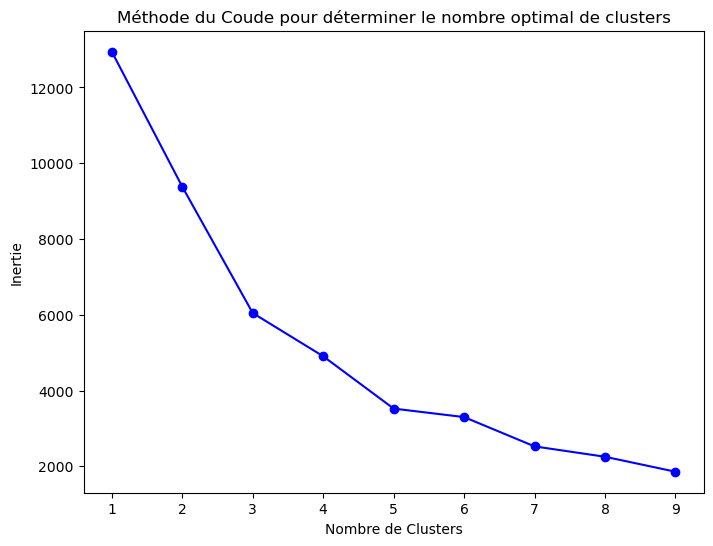

In [137]:
# Tracer le graphique de la méthode du coude
plt.figure(figsize=(8,6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Inertie')
plt.title('Méthode du Coude pour déterminer le nombre optimal de clusters')
plt.show()

In [138]:
# Appliquer K-means avec le nombre de clusters optimal (par exemple k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [142]:
# Afficher les résultats
print(rfm.groupby('Cluster').mean())

             Recency   Frequency     Monetary
Cluster                                      
0        5111.470080    4.988279    -3.639970
1        5311.223374    1.683318    -0.540369
2        5073.727273  114.272727  1124.919367


In [144]:
from sklearn.cluster import DBSCAN

In [146]:
# Appliquer DBSCAN sur les données RFM standardisées
dbscan = DBSCAN(eps=0.5, min_samples=5)
rfm['Cluster_DBSCAN'] = dbscan.fit_predict(rfm_scaled)

In [148]:
# Afficher le nombre de clients dans chaque cluster
print(rfm['Cluster_DBSCAN'].value_counts())
# Afficher les moyennes par cluster
print(rfm.groupby('Cluster_DBSCAN').mean())

Cluster_DBSCAN
 0    4242
-1      72
Name: count, dtype: int64
                    Recency  Frequency    Monetary   Cluster
Cluster_DBSCAN                                              
-1              5121.375000  43.722222  274.177129  0.444444
 0              5161.165959   3.787600   -4.653643  0.247760


In [150]:
# Créer des scores pour chaque dimension R, F, M
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=False)
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=False)
rfm['M_score'] = pd.qcut(rfm['Monetary'], 5, labels=False)

# Calculer le score RFM total
rfm['RFM_Score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)

# Afficher les clients avec leurs scores RFM
print(rfm[['Recency', 'Frequency', 'Monetary', 'RFM_Score']].head())

             Recency  Frequency  Monetary RFM_Score
Customer ID                                        
12346.0         5234         11 -4.433438       341
12347.0         5072          2 -2.783917       012
12348.0         5143          1 -2.736393       302
12349.0         5113          3  5.981902       224
12351.0         5080          1 -1.996163       002


In [152]:
# Segmenter les clients selon les scores RFM
segments = {
    '555': 'Best Customers',
    '111': 'Lost Customers',
    # Ajouter plus de segments selon la stratégie
}

rfm['Segment'] = rfm['RFM_Score'].map(segments)

In [154]:
# Afficher le nombre de clients par segment
print(rfm['Segment'].value_counts())

Segment
Lost Customers    39
Name: count, dtype: int64


In [158]:
#4. Optimisation des hyperparamètres
from sklearn.metrics import silhouette_score
# Calculer le Silhouette score pour différents nombres de clusters
silhouette_scores = []
K = range(2, 11)  # Le Silhouette score ne fonctionne pas pour k=1
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(rfm_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)


In [160]:
#4. Optimisation des hyperparamètres
# Appliquer DBSCAN avec différents paramètres
dbscan = DBSCAN(eps=0.3, min_samples=10)
rfm['Cluster_DBSCAN'] = dbscan.fit_predict(rfm_scaled)

# Calculer le Silhouette score pour DBSCAN
silhouette_avg_dbscan = silhouette_score(rfm_scaled, rfm['Cluster_DBSCAN'])
print(f'Silhouette Score pour DBSCAN: {silhouette_avg_dbscan}')

Silhouette Score pour DBSCAN: 0.6607489570803159


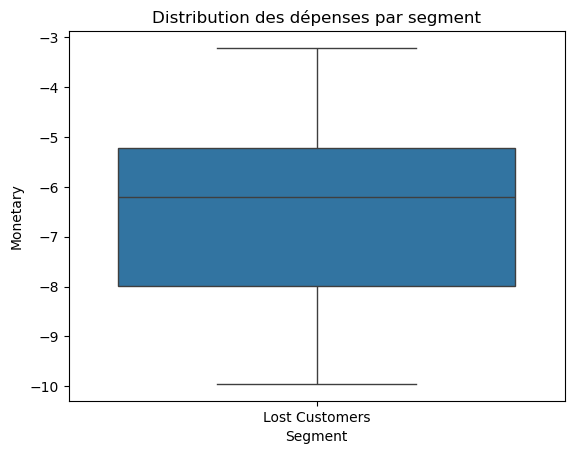

In [162]:
#5. Visualisation et Interprétation des résultats
# Créer des boîtes à moustaches pour la variable "Monetary" par segment
sns.boxplot(x='Segment', y='Monetary', data=rfm)
plt.title('Distribution des dépenses par segment')
plt.show()

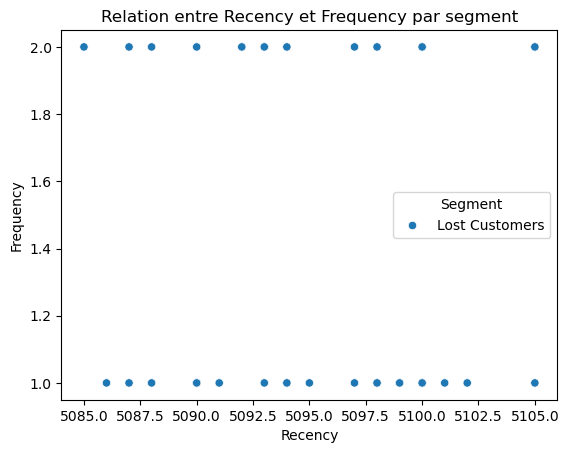

In [164]:
# Créer un diagramme en nuage de points pour visualiser la relation entre Recency et Frequency
sns.scatterplot(x='Recency', y='Frequency', hue='Segment', data=rfm)
plt.title('Relation entre Recency et Frequency par segment')
plt.show()

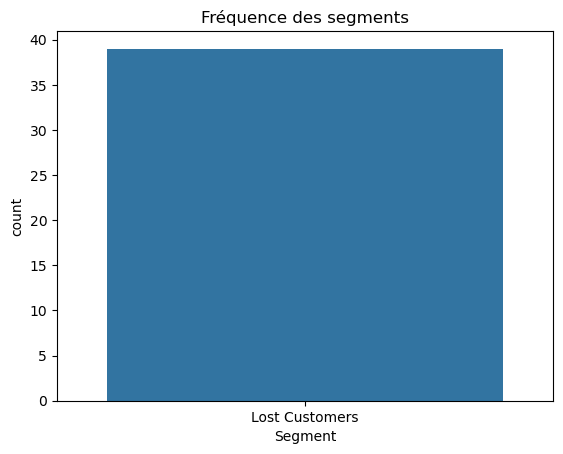

In [166]:
# Créer un graphique à barres pour comparer la fréquence des segments
sns.countplot(x='Segment', data=rfm)
plt.title('Fréquence des segments')
plt.show()